# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel('all-leaguetables.xlsx', sheet_name='all-leaguetables.csv',  engine = 'openpyxl')
df.head(4)

/srv/conda/envs/notebook/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,League,Season,Position,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDiff,FinalPoints
0,Premier League,2015/16,2,Arsenal,38,20,11,7,65,36,29,71
1,Premier League,2015/16,20,Aston Villa,38,3,8,27,27,76,-49,17
2,Premier League,2015/16,16,Bournemouth,38,11,9,18,45,67,-22,42
3,Premier League,2015/16,10,Chelsea,38,12,14,12,59,53,6,50


In [3]:
df.columns


Index(['League', 'Season', 'Position', 'Team', 'Matches', 'Wins', 'Draws',
       'Losses', 'GoalsScored', 'GoalsConceded', 'GoalDiff', 'FinalPoints'],
      dtype='object')

In [4]:
team=df.drop(['League','Matches', 'Wins', 'Draws','Losses', 'GoalsScored', 'GoalsConceded','GoalDiff','Position'], axis=1)
team.set_index('Team', inplace=True)
team.head(4)

,Season,FinalPoints
Team,,
Arsenal,2015/16,71
Aston Villa,2015/16,17
Bournemouth,2015/16,42
Chelsea,2015/16,50


In [5]:
goal=df.drop(['League','Matches', 'Wins', 'Draws','Losses', 'GoalsConceded','GoalDiff','Position','FinalPoints','Season'], axis=1)
goal.set_index('Team', inplace=True)
goal.rename(columns={'GoalsScored':'Goals'},inplace=True)
goal.head(4)

,Goals
Team,
Arsenal,65
Aston Villa,27
Bournemouth,45
Chelsea,59


In [6]:
goal=goal.pivot_table(goal,index='Team', aggfunc='sum').sort_values(by='Goals',ascending=False)
goal=goal[:5]

Team,FC Barcelona,Manchester City,Bayern Munich,Real Madrid,Liverpool
Goals,503,454,449,443,399


In [7]:
fcb=team.loc['FC Barcelona']
fcb.rename(columns={'FinalPoints':'FC Barcelona Points'},inplace=True)
fcb.set_index('Season', inplace=True)
fcb

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,FC Barcelona Points
Season,
2015/16,91
2016/17,90
2017/18,93
2018/19,87
2019/20,82


In [8]:
rmd=team.loc['Real Madrid']
rmd.rename(columns={'FinalPoints':'Real Madrid Points'},inplace=True)
rmd.set_index('Season', inplace=True)
rmd

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Real Madrid Points
Season,
2015/16,90
2016/17,93
2017/18,76
2018/19,68
2019/20,87


In [9]:
MvB=pd.merge(rmd,fcb, on='Season')
MvB

,Real Madrid Points,FC Barcelona Points
Season,,
2015/16,90,91
2016/17,93,90
2017/18,76,93
2018/19,68,87
2019/20,87,82


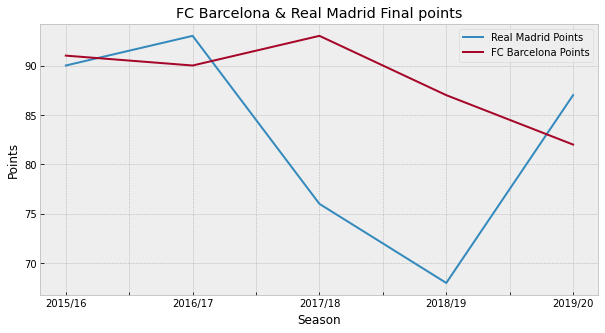

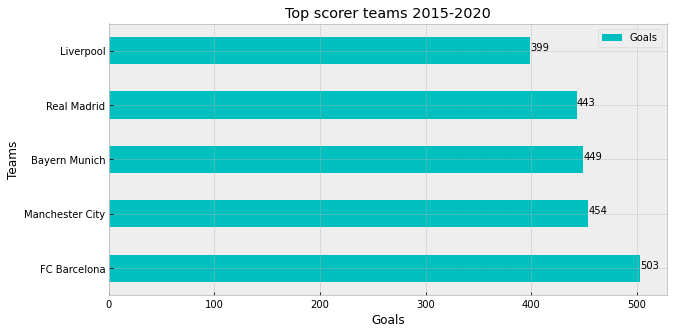

In [46]:
mpl.style.use(['bmh'])
MvB.plot(figsize=(10,5))
plt.title('FC Barcelona & Real Madrid Final points')
plt.ylabel('Points')
plt.xlabel('Season')
plt.show()
goal.plot(kind='barh',color='c',figsize=(10,5))
plt.title('Top scorer teams 2015-2020')
plt.ylabel('Teams')
plt.xlabel('Goals')
for i, value in enumerate(goal['Goals']):
    plt.text(value, i, str(value))
plt.show()